O que esse código faz?

Limpa o dataset (remove lixo, trata NaN).

Codifica textos em números.

Mostra correlação entre variáveis.

Faz uma redução de dimensionalidade com PCA pra você visualizar os dados.

Faz agrupamento (Clustering) usando KMeans — descobre padrões escondidos.

Faz uma regressão linear — tenta prever o Compliance_Score com base nos outros dados.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Carregar dados
df = pd.read_csv('Cybersecurity.csv') 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 152 non-null    int64 
 1   Date                 152 non-null    object
 2   Control_Set          152 non-null    object
 3   Control              152 non-null    object
 4   Control_Name         152 non-null    object
 5   Control_Family_Code  40 non-null     object
 6   Definition           122 non-null    object
 7   Compliance_Score     152 non-null    int64 
 8   Reporting_Date       152 non-null    object
 9   ObjectId             152 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 12.0+ KB


In [10]:
df.head()

,Year,Date,Control_Set,Control,Control_Name,Control_Family_Code,Definition,Compliance_Score,Reporting_Date,ObjectId
0,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,18,2022/12/31 07:00:00+00,1
1,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,23,2022/12/31 07:00:00+00,2
2,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 3,Audit and Accountability,AU,NaN,32,2022/12/31 07:00:00+00,3
3,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 4,"Assessment, Authorization, and Monitoring",CA,NaN,71,2022/12/31 07:00:00+00,4
4,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 5,Configuration Management,CM,NaN,77,2022/12/31 07:00:00+00,5


In [12]:
# Visualizar as primeiras linhas
print(df.head())

   Year                    Date              Control_Set Control  \
0  2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)  NIST 1   
1  2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)  NIST 2   
2  2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)  NIST 3   
3  2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)  NIST 4   
4  2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)  NIST 5   

                                Control_Name Control_Family_Code  \
0                             Access Control                  AC   
1                    Awareness and Training                   AT   
2                   Audit and Accountability                  AU   
3  Assessment, Authorization, and Monitoring                  CA   
4                   Configuration Management                  CM   

                                          Definition  Compliance_Score  \
0  Access to assets and associated facilities is ...                18   
1  The organization’s personnel an

In [13]:
#Tratar valores nulos e valores ausentes: 
# Verificar valores nulos
print(df.isnull().sum())

# Preencher valores nulos com a média (para colunas numéricas)
df.fillna(df.mean(numeric_only=True), inplace=True)

Year                     0
Date                     0
Control_Set              0
Control                  0
Control_Name             0
Control_Family_Code    112
Definition              30
Compliance_Score         0
Reporting_Date           0
ObjectId                 0
dtype: int64


In [15]:
print(df.columns)

Index(['Year', 'Date', 'Control_Set', 'Control', 'Control_Name',
       'Control_Family_Code', 'Definition', 'Compliance_Score',
       'Reporting_Date', 'ObjectId'],
      dtype='object')


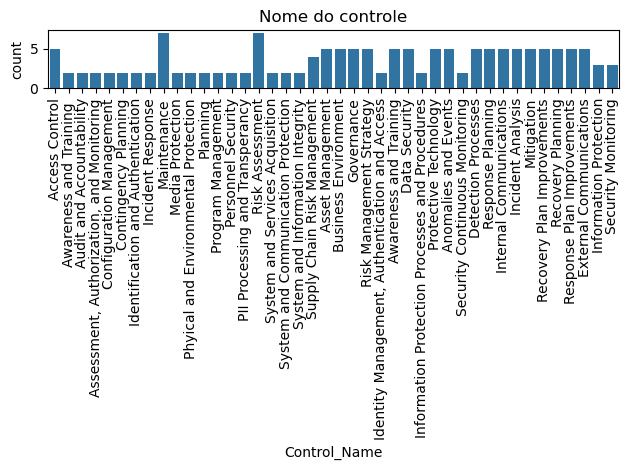

In [18]:
sns.countplot(data=df, x='Control_Name')
plt.title('Nome do controle')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
# Drop de colunas inúteis
df = df.drop(columns=['Date', 'Reporting_Date', 'ObjectId', 'Control_Family_Code'])

In [21]:
# Tratar NaN
df.fillna('-', inplace=True)

In [22]:
# Encoding de categóricos
le = LabelEncoder()
for col in ['Control_Set', 'Control', 'Control_Name', 'Definition']:
    df[col] = le.fit_transform(df[col])

In [23]:
# Verificar
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              152 non-null    int64
 1   Control_Set       152 non-null    int32
 2   Control           152 non-null    int32
 3   Control_Name      152 non-null    int32
 4   Definition        152 non-null    int32
 5   Compliance_Score  152 non-null    int64
dtypes: int32(4), int64(2)
memory usage: 4.9 KB
None
   Year  Control_Set  Control  Control_Name  Definition  Compliance_Score
0  2022            1        0             0           1                18
1  2022            1       11             6          21                23
2  2022            1       16             4           0                32
3  2022            1       17             2           0                71
4  2022            1       18             8           0                77


In [24]:
!pip install pandas seaborn matplotlib scikit-learn

Da limpeza ao clustering e regressão

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
print("\n Dataset original:")
print(df.info())
print(df.head())


 Dataset original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              152 non-null    int64
 1   Control_Set       152 non-null    int32
 2   Control           152 non-null    int32
 3   Control_Name      152 non-null    int32
 4   Definition        152 non-null    int32
 5   Compliance_Score  152 non-null    int64
dtypes: int32(4), int64(2)
memory usage: 4.9 KB
None
   Year  Control_Set  Control  Control_Name  Definition  Compliance_Score
0  2022            1        0             0           1                18
1  2022            1       11             6          21                23
2  2022            1       16             4           0                32
3  2022            1       17             2           0                71
4  2022            1       18             8           0                77


In [33]:
#Limpeza dos dados e substituição por '-': 
#df.drop(columns=['Date', 'Reporting_Date', 'ObjectId', 'Control_Family_Code'], inplace=True)
#df.fillna('-', inplace=True)

In [34]:
# ENCODING (Transformando texto em número)
le = LabelEncoder()

In [35]:
categoricas = ['Control_Set', 'Control', 'Control_Name', 'Definition']

In [36]:
for col in categoricas:
    df[col] = le.fit_transform(df[col])

print("\n Dataset pós-limpeza e encoding:")
print(df.head())


 Dataset pós-limpeza e encoding:
   Year  Control_Set  Control  Control_Name  Definition  Compliance_Score
0  2022            1        0             0           1                18
1  2022            1       11             6          21                23
2  2022            1       16             4           0                32
3  2022            1       17             2           0                71
4  2022            1       18             8           0                77


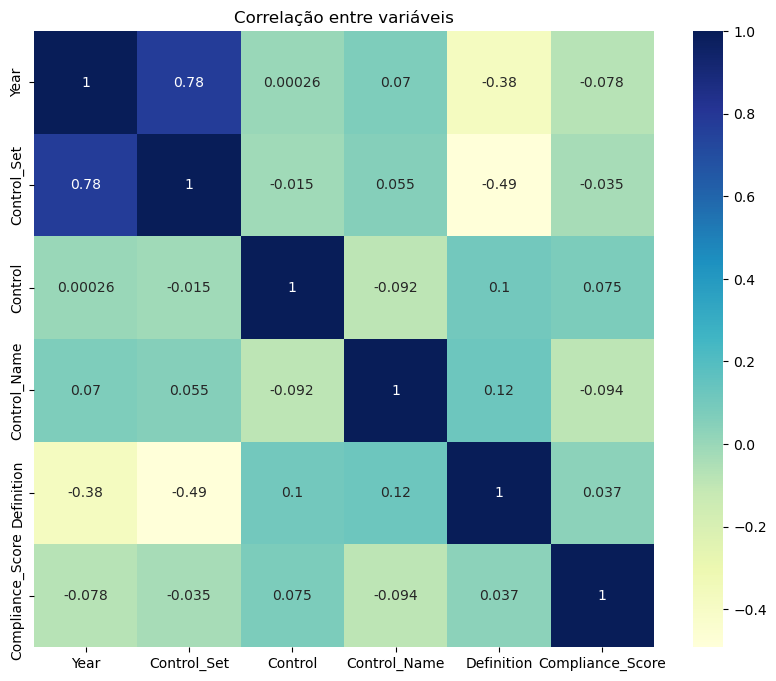

In [37]:
# ANÁLISE EXPLORATÓRIA

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlação entre variáveis')
plt.show()

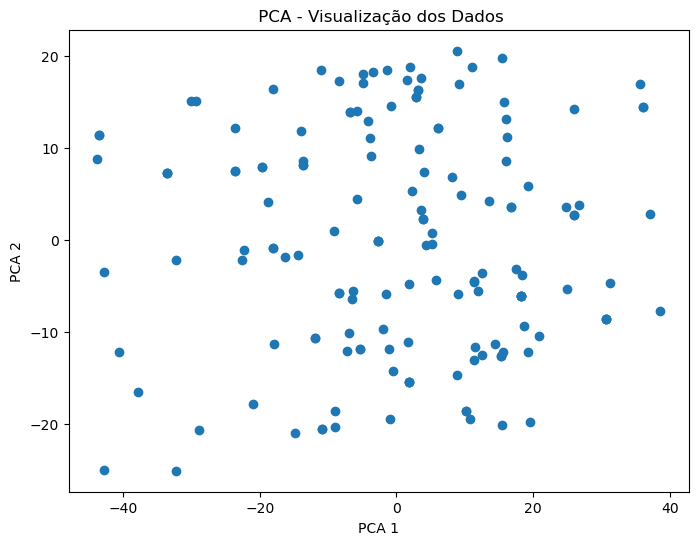

In [38]:
# PCA para Visualização (reduzir dimensionalidade)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title(' PCA - Visualização dos Dados')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\Jamielly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


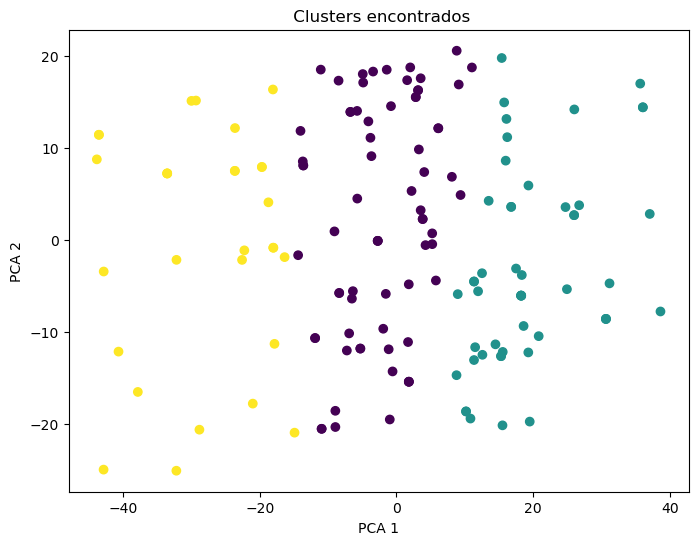


 Dados com cluster atribuído:
   Year  Control_Set  Control  Control_Name  Definition  Compliance_Score  \
0  2022            1        0             0           1                18   
1  2022            1       11             6          21                23   
2  2022            1       16             4           0                32   
3  2022            1       17             2           0                71   
4  2022            1       18             8           0                77   

   Cluster  
0        2  
1        2  
2        2  
3        1  
4        1  


In [39]:
# AGRUPAMENTO (CLUSTERING)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title(' Clusters encontrados')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

df['Cluster'] = clusters
print("\n Dados com cluster atribuído:")
print(df.head())

In [40]:
# REGRESSÃO - Prevendo Compliance_Score

# Features e target
X = df.drop(columns=['Compliance_Score'])
y = df['Compliance_Score']

In [41]:
# Split treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
# Previsões
y_pred = reg.predict(X_test)

In [44]:
# Avaliação
mse = mean_squared_error(y_test, y_pred)
print(f"\n Erro Quadrático Médio da Regressão: {mse:.2f}")


 Erro Quadrático Médio da Regressão: 366.40


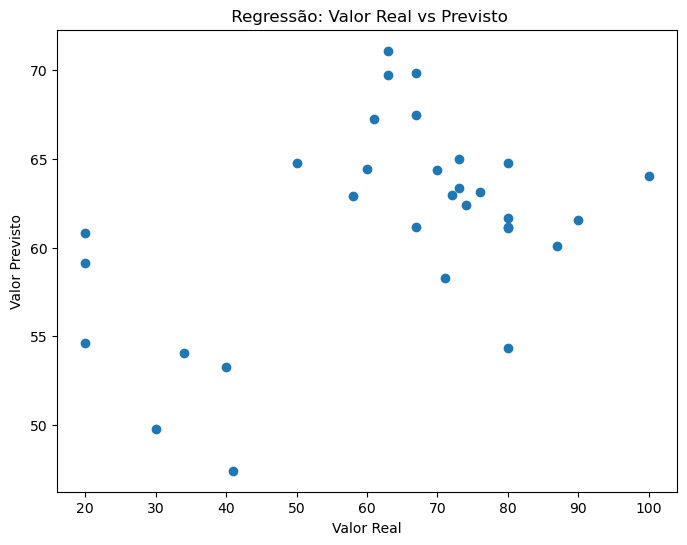

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title(' Regressão: Valor Real vs Previsto')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.show()

In [46]:
#teste final  
print(" Pipeline executado com sucesso!")

 Pipeline executado com sucesso!


Conclusão da parte de ML

O que já foi feito:

- PCA → pra visualização e simplificação

- KMeans → pra detectar agrupamentos

- Regressão Linear → como primeira tentativa de predição

Agora o caminho é:

- Testar outros modelos

- Transformar o problema em classificação (opcional)

- Usar métricas robustas

- Validar melhor

In [48]:
#gerar relatorio autiomatico completasso em HTML - ajuda a ter uma visão mais ampla sobre

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Relatório de Análise Cibernética", explorative=True)
profile.to_file("relatorio_cyberseguranca.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 20.87it/s]
C:\Users\Jamielly\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 9 9 4 4 4 9 0 0 9 0 9 4 4 0 0 0 0 0 0 4 4 0 4 4 4 4 0 9 9 0 0 0 0 4 0 0
 0 0 0 0 4 4 0 0 9 4 4 0 4 9 9 0 0 0 4 0 0 0 0 9 0 4 0 4 4 0 0 9 4 4 0 4 9
 9 0 0 0 0 0 0 0 0 9 0 4 0 4 0 0 0 9 4 0 0 4 9 9 0 0 0 0 0 0 0 9 0 4 4 0 0
 0 9 4 4 0 0 4 0 0 9 9 4 0 4 4 4 4 4 4 9 4 4 9 9 4 0 4 4 9 9 0 4 0 9 9 4 4
 0 4 4 4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]